# Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single fil

In [2]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


Importing all the necessary libraries here.

In [3]:
df = pd.read_csv("avocado.csv")

In [4]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-18,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-18,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-18,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-18,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Exploratory Data Analysis (EDA)

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

I have removed the "Unnamed" column from our dataset now.

In [7]:
df.shape

(18249, 13)

In [8]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [10]:
df.isna().sum() # was simply cross verifying for null values and luckily we do not have any missing data that needs to be treated.

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [12]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

All the unique values present in each column are segregated and listed here. This gives us an insight on how many categorical options like type and year are present and how many simply have continous data present in them.

In [13]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

The acceptable range for skewness is between +/-0.5. And we see almost all feature columns with skewness for now. Once we have processed the data further we may check for the skewness details again and if it still persists then we will need to treat it accordingly.



In [14]:
df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-').str
df.drop(columns=['Date','year'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,27,12,15
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,20,12,15
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,13,12,15
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,06,12,15
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,29,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,04,02,18
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,28,01,18
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,21,01,18
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,14,01,18


I have separated the Date column into 3 columns namely the Year, Month and Day option so that we can remove Date the object datatype column and year that is already present in Date so we are avoiding duplicate columns.



# Visualization


Univariate Analysis


conventional    9126
organic         9123
Name: type, dtype: int64


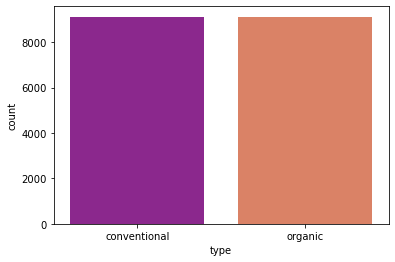

In [15]:
print(df['type'].value_counts())
sns.countplot(x='type', data=df, palette="plasma")
plt.show()

In the "type" column we have data points for conventional and organic avacados.



04    756
11    756
18    755
25    755
01    648
26    648
05    648
12    648
03    648
08    648
15    648
22    648
24    648
17    648
10    648
19    648
07    540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
06    539
02    432
09    432
23    432
30    432
31    432
16    432
Name: Year, dtype: int64


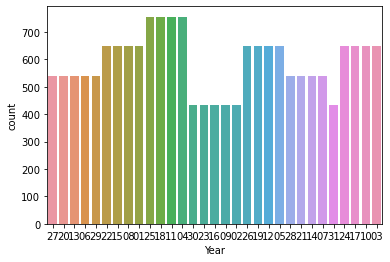

In [16]:
print(df['Year'].value_counts())
sns.countplot(x='Year', data=df)
plt.show()

01    1944
03    1836
02    1728
10    1512
07    1512
05    1512
11    1404
08    1404
04    1404
12    1403
09    1296
06    1294
Name: Month, dtype: int64


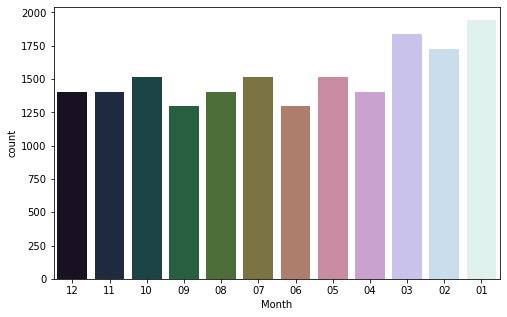

In [17]:
print(df['Month'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='Month', data=df, palette="cubehelix")
plt.show()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

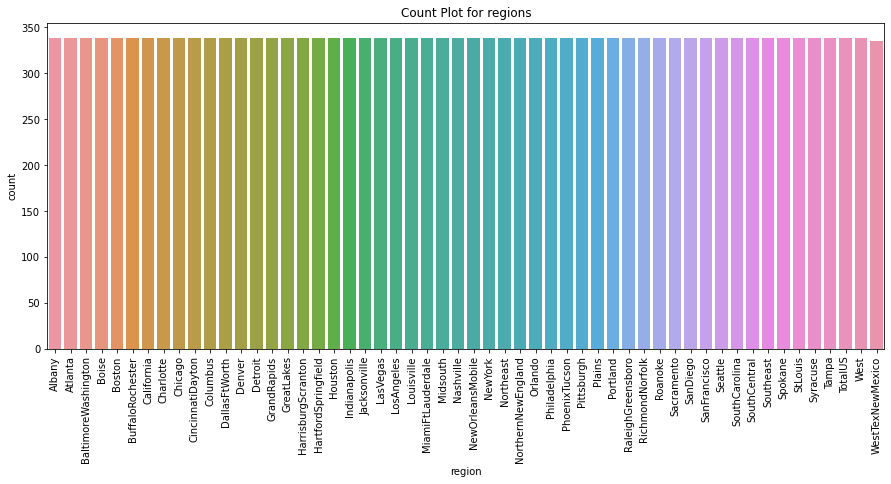

In [19]:
print(df['region'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(df['region'], data=df)
plt.title(f'Count Plot for regions')
plt.xticks(rotation=90)
plt.show()

Bivariate analysis


<Figure size 1080x720 with 0 Axes>

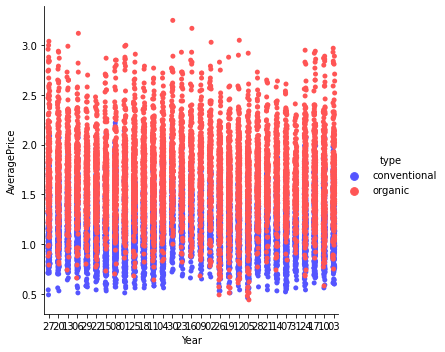

In [31]:
plt.figure(figsize=(15,10))
sns.catplot(x="Year", y="AveragePrice", hue="type", data=df, palette="seismic")
plt.show()

<Figure size 1080x720 with 0 Axes>

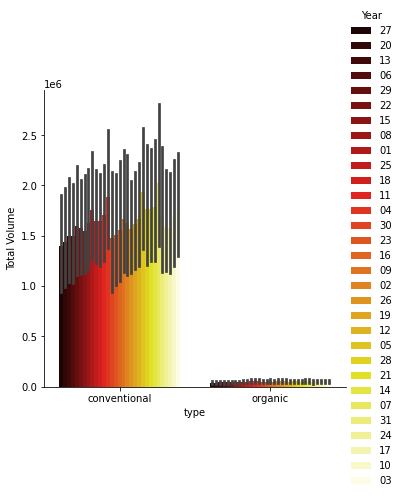

In [32]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="Year", kind="bar", data=df, palette="hot")
plt.show()

<Figure size 1080x720 with 0 Axes>

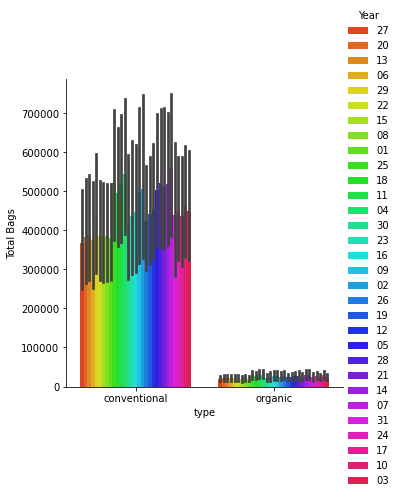

In [33]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="Year", data=df, kind="bar", palette="hsv")
plt.show()

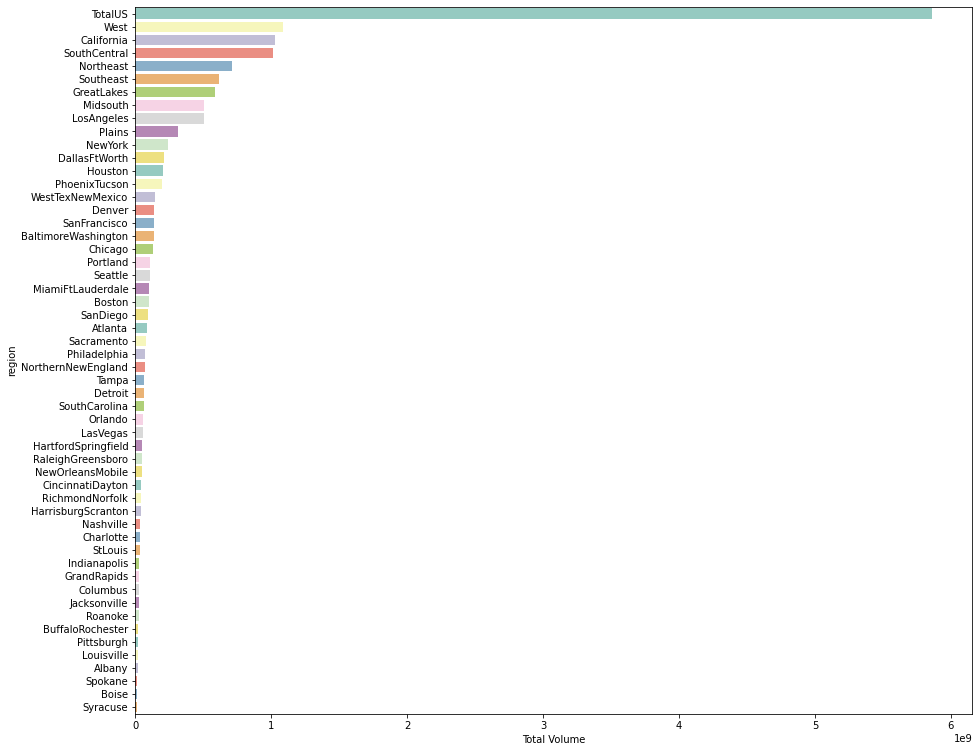

In [34]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set3")
plt.show()

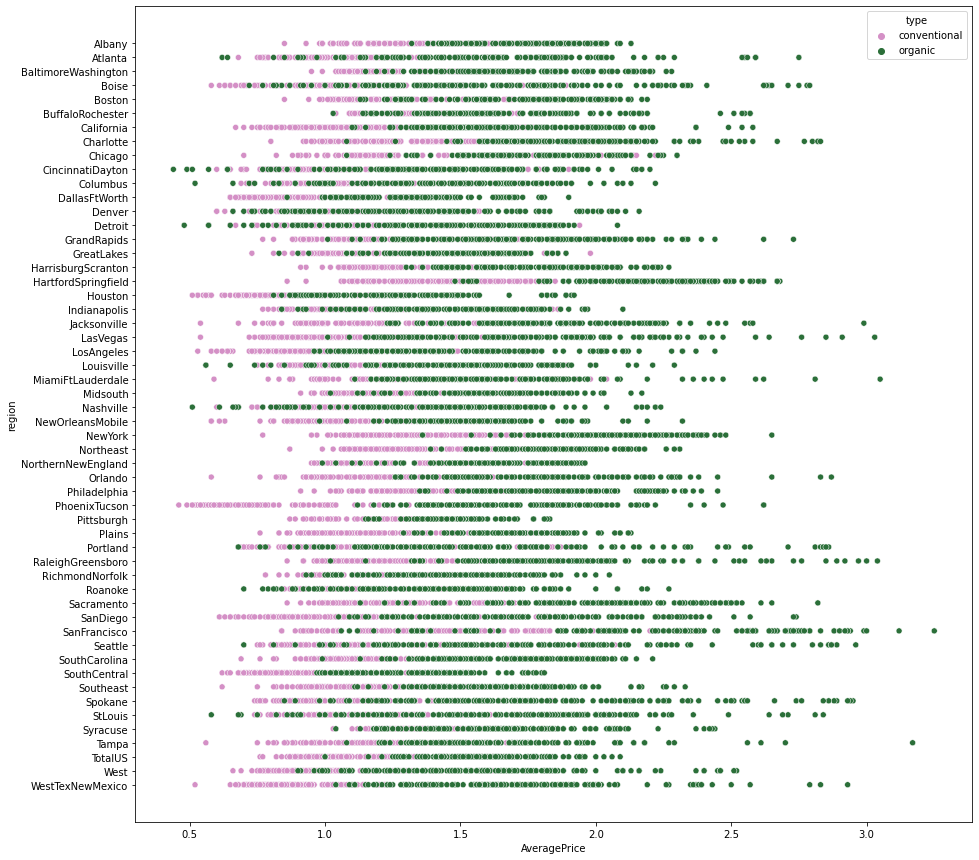

In [35]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette="cubehelix_r")
plt.show()

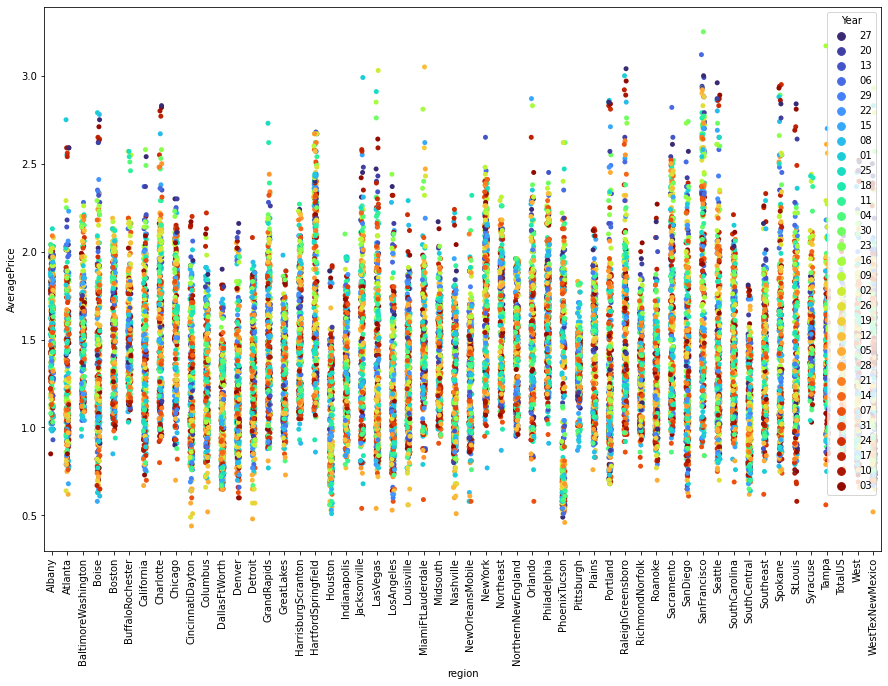

In [38]:
plt.figure(figsize=(15,10))
sns.stripplot(x='region', y='AveragePrice', hue="Year", data=df, palette="turbo")
plt.xticks(rotation=90)
plt.show()

Multivariate Analysis


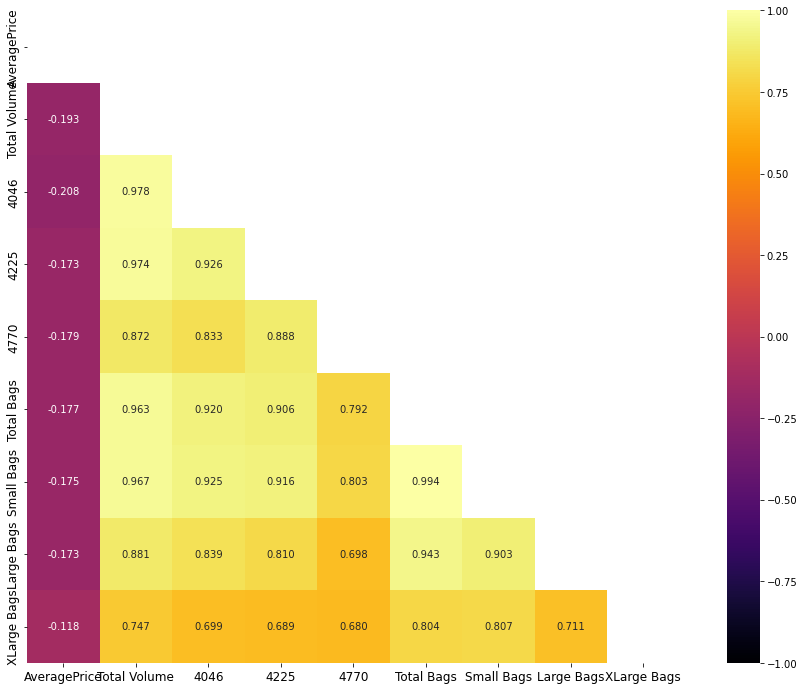

In [39]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="inferno", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [40]:
df.drop(["4046", "4225", "4770", "Small Bags", "Large Bags", "XLarge Bags"], axis=1, inplace=True)


# Encoding


In [41]:
oe = OrdinalEncoder()
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,Total Bags,type,region,Year,Month,Day
0,1.33,64236.62,8696.87,0.0,0.0,27,12,15
1,1.35,54876.98,9505.56,0.0,0.0,20,12,15
2,0.93,118220.22,8145.35,0.0,0.0,13,12,15
3,1.08,78992.15,5811.16,0.0,0.0,06,12,15
4,1.28,51039.60,6183.95,0.0,0.0,29,11,15
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,04,02,18
18245,1.71,13888.04,9264.84,1.0,53.0,28,01,18
18246,1.87,13766.76,9394.11,1.0,53.0,21,01,18
18247,1.93,16205.22,10969.54,1.0,53.0,14,01,18


Using the ordinal encoding method we have changed the object datatype columns into numeric values as machine learning models cannot process object data types.



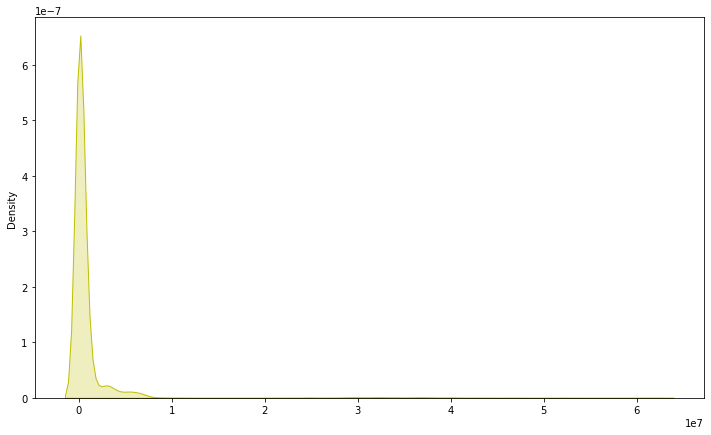

In [50]:
plt.figure(figsize=(12,7))
sns.distplot(x=df["Total Volume"], hist=False, color="y", kde_kws={"shade": True})
plt.show()

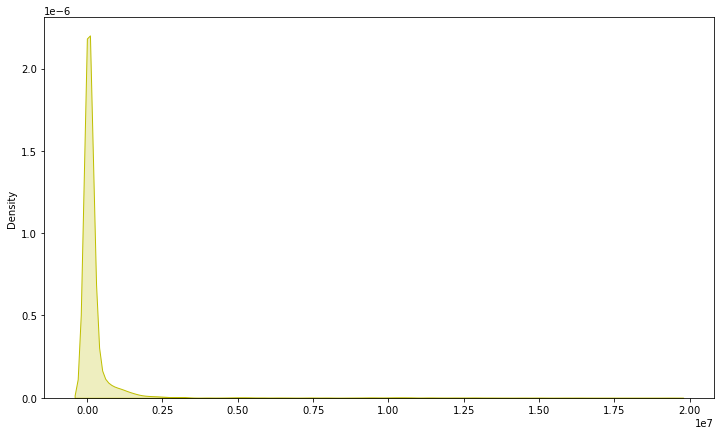

In [51]:
plt.figure(figsize=(12,7))
sns.distplot(x=df["Total Bags"], hist=False, color="y", kde_kws={"shade": True})
plt.show()

In [52]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [53]:
df.skew()

AveragePrice    0.138629
Total Volume    0.088098
Total Bags     -0.218874
type            0.000329
region          0.000030
Year            0.014310
Month           0.106617
Day             0.215339
dtype: float64

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label


In [54]:
X = df.drop('AveragePrice', axis=1)
Y = df['AveragePrice']

Feature Scaling


In [55]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,Total Volume,Total Bags,type,region,Year,Month,Day
0,-0.107282,-0.494074,-0.999836,-1.700252,1.291857,1.647632,-1.221282
1,-0.175949,-0.454761,-0.999836,-1.700252,0.494231,1.647632,-1.221282
2,0.158690,-0.523041,-0.999836,-1.700252,-0.303396,1.647632,-1.221282
3,-0.017121,-0.672335,-0.999836,-1.700252,-1.101022,1.647632,-1.221282
4,-0.207558,-0.644845,-0.999836,-1.700252,1.519750,1.364669,-1.221282
5,-0.167273,-0.610471,-0.999836,-1.700252,0.722124,1.364669,-1.221282
6,0.006837,-0.513722,-0.999836,-1.700252,-0.075502,1.364669,-1.221282
7,0.124994,-0.600962,-0.999836,-1.700252,-0.873129,1.364669,-1.221282
8,0.084884,-0.374857,-0.999836,-1.700252,-1.670755,1.364669,-1.221282
9,-0.043595,-0.497696,-0.999836,-1.700252,1.063964,1.081706,-1.221282


Finding best random state for building Regression Models


In [56]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5154450113185596 on Random State 672


# Creating the training and testing data sets


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=144)


I am taking 25 percent of the complete dataset for training purpose and the remaing 75 percent with be used to train the machine learning models



# Machine Learning Model for Regression with Evaluation Metrics


In [58]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.



In [59]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.1180884448488233
R2 Score is: 49.46692305714959
Cross Validation Score: 14.36245355516394
R2 Score - Cross Validation Score is 35.104469501985655


In [60]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 0.11814812553871412
R2 Score is: 49.41583235157412
Cross Validation Score: 14.605662329622
R2 Score - Cross Validation Score is 34.81017002195212


In [61]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 0.1661384035627347
R2 Score is: -0.023259400117914275
Cross Validation Score: -103.77105535400972
R2 Score - Cross Validation Score is 103.74779595389181


In [62]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.11210080927306175
R2 Score is: 54.46153029718257
Cross Validation Score: -8.02628059895194
R2 Score - Cross Validation Score is 62.48781089613451


In [63]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 0.13978486278103244
R2 Score is: 29.192179707087394
Cross Validation Score: -114.30802268240608
R2 Score - Cross Validation Score is 143.50020238949347


In [64]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.12465408972165808
R2 Score is: 43.69149461274272
Cross Validation Score: -8.581191541317308
R2 Score - Cross Validation Score is 52.27268615406003


In [65]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.1250371484258334
R2 Score is: 43.34489380166118
Cross Validation Score: -4.323790334000736
R2 Score - Cross Validation Score is 47.66868413566191


In [66]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 0.1163216393037702
R2 Score is: 50.96773397706138
Cross Validation Score: -9.266608256697543
R2 Score - Cross Validation Score is 60.23434223375892


In [67]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.11395995808010718
R2 Score is: 52.93852895410907
Cross Validation Score: -0.2928233916340717
R2 Score - Cross Validation Score is 53.23135234574314


In [68]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.07086091679985346
R2 Score is: 81.80406107365673
Cross Validation Score: 19.500158525855944
R2 Score - Cross Validation Score is 62.30390254780078


# Hyper parameter tuning on the best ML Model


In [71]:
# Choosing XGB Regressor

fmod_param = {'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

After comparing all the regression models I have selected XGB Regressor as my best model and have listed down it's parameters above referring the sklearn webpage

